## **Assumptions**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import data
df = pd.read_csv("wp_df.csv")

## **All-Data Buckets**

### **Previous Month (t-1)**

Compare the relationship between a stocks returns in a given month, and its own volatility in the previous month.

In [3]:
# New df with only necessary variables
df_vol = df[['ret','vol_1m', 'vol']]
# Create new variable that represents volatility buckets
df_vol['vol_bucket'] = pd.qcut(df_vol['vol_1m'], q=5, labels=False)
# Create new df that groups data by the mean of the volatility buckets
buckets_vol = df_vol.groupby('vol_bucket').mean()
# Create Sharpe Ratio column (not Sharpe by definition, since it is not being calculated with excess returns)
buckets_vol['sr'] = buckets_vol.ret / buckets_vol.vol_1m
# Keep only necessary columns
buckets_vol = buckets_vol[['ret','vol_1m','sr']]

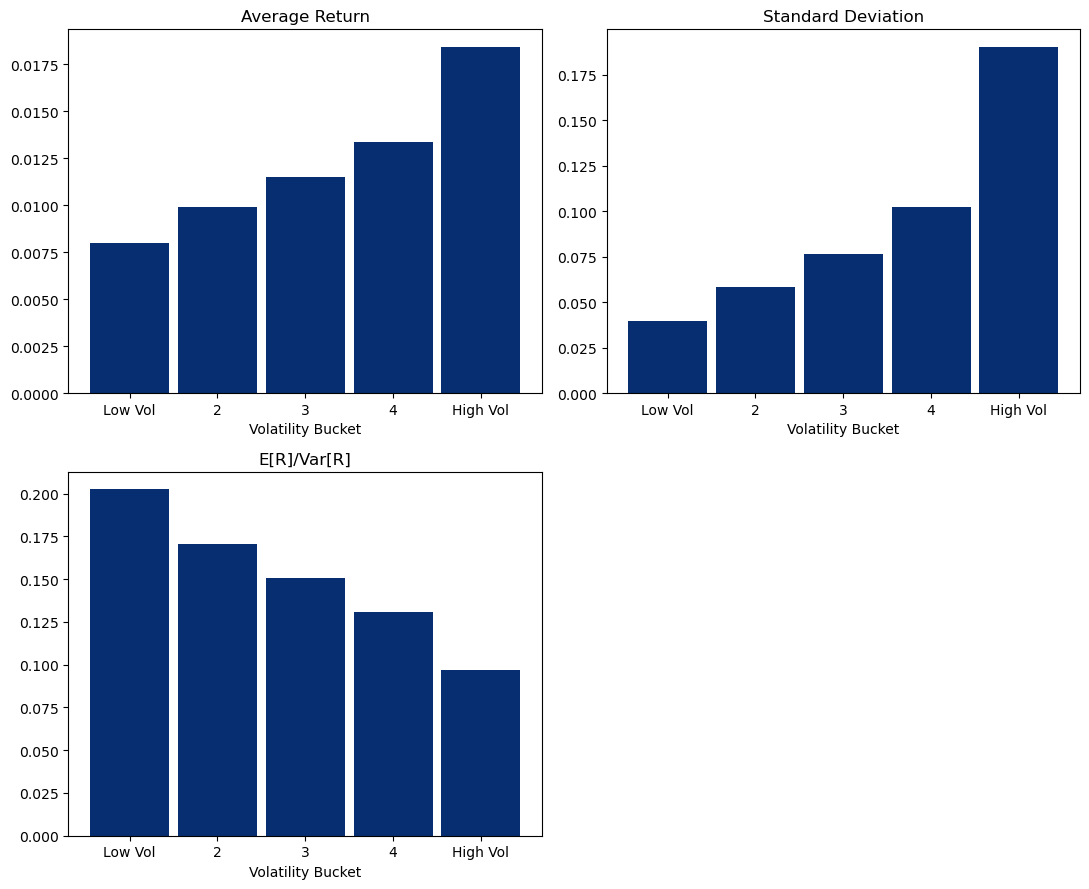

In [4]:
# Plot the data
titles = ["Average Return", "Standard Deviation", "E[R]/Var[R]"]
x_labels = ["Low Vol", "2", "3", "4", "High Vol"]

# Create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(11, 9))

# Flatten the axs array for easier indexing
axs = axs.flatten()

for i, column in enumerate(buckets_vol.columns):
    title = f"{titles[i]}"
    ax = axs[i]
    ax.bar(x_labels, buckets_vol[column], color='#062e70', width=0.9)
    ax.set_title(title)
    ax.set_xticklabels(x_labels, rotation=0)
    ax.set_xlabel("Volatility Bucket")

# Hide the empty subplot in the last position
axs[-1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

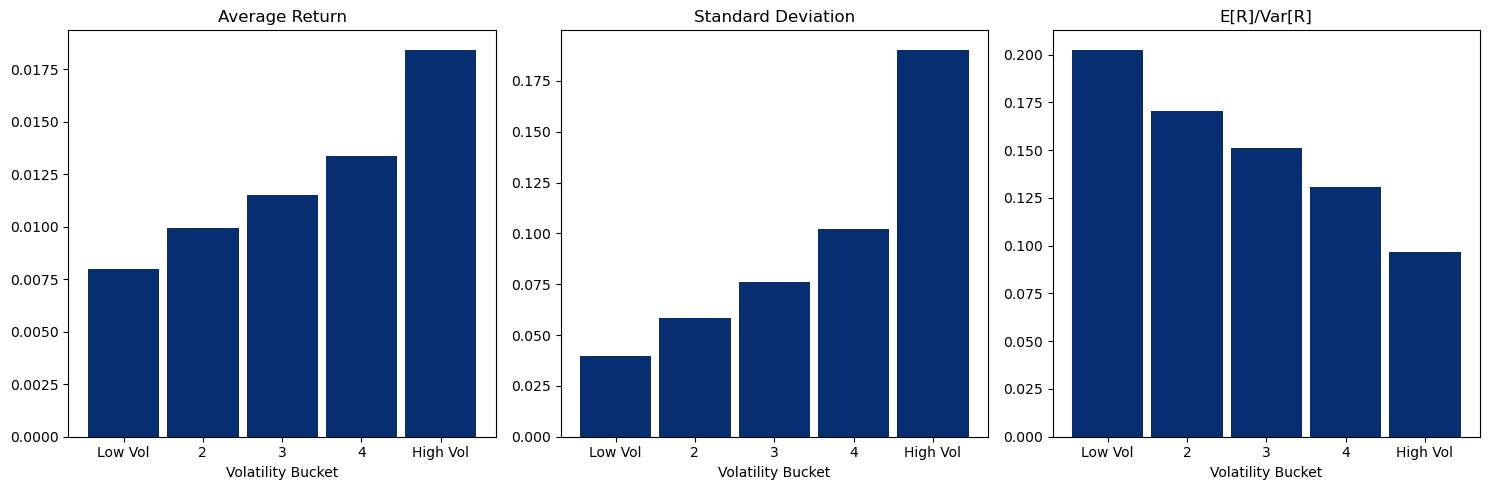

In [5]:
# Plot the data
titles = ["Average Return", "Standard Deviation", "E[R]/Var[R]"]
x_labels = ["Low Vol", "2", "3", "4", "High Vol"]

# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Flatten the axs array for easier indexing
axs = axs.flatten()

for i, column in enumerate(buckets_vol.columns):
    title = f"{titles[i]}"
    ax = axs[i]
    ax.bar(x_labels, buckets_vol[column], color='#062e70', width=0.9)
    ax.set_title(title)
    ax.set_xticklabels(x_labels, rotation=0)
    ax.set_xlabel("Volatility Bucket")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## **Intra-Month Buckets**

### **Previous Month (t-1)**

Compare the relationship between a stocks returns in a given month, and its own volatility in the previous month.

In [6]:
# New df with only necessary variables
df_vol = df[['datadate','ret','vol_1m','vol']]
# Create new variable that represents volatility buckets within each month
df_vol['vol_bucket'] = df_vol.groupby('datadate')['vol_1m'].transform(lambda x: pd.qcut(x, q=5, labels=False))
# Create new df that groups data by the mean of the volatility buckets within each month
buckets_vol = df_vol.groupby(['datadate', 'vol_bucket']).mean().reset_index()
# Create new df that groups data by the mean of the volatility buckets
buckets_vol = df_vol[['vol_bucket', 'ret', 'vol']].groupby('vol_bucket').mean()
# Create Sharpe Ratio column (not Sharpe by definition, since it is not being calculated with excess returns)
buckets_vol['sr'] = buckets_vol.ret / buckets_vol.vol

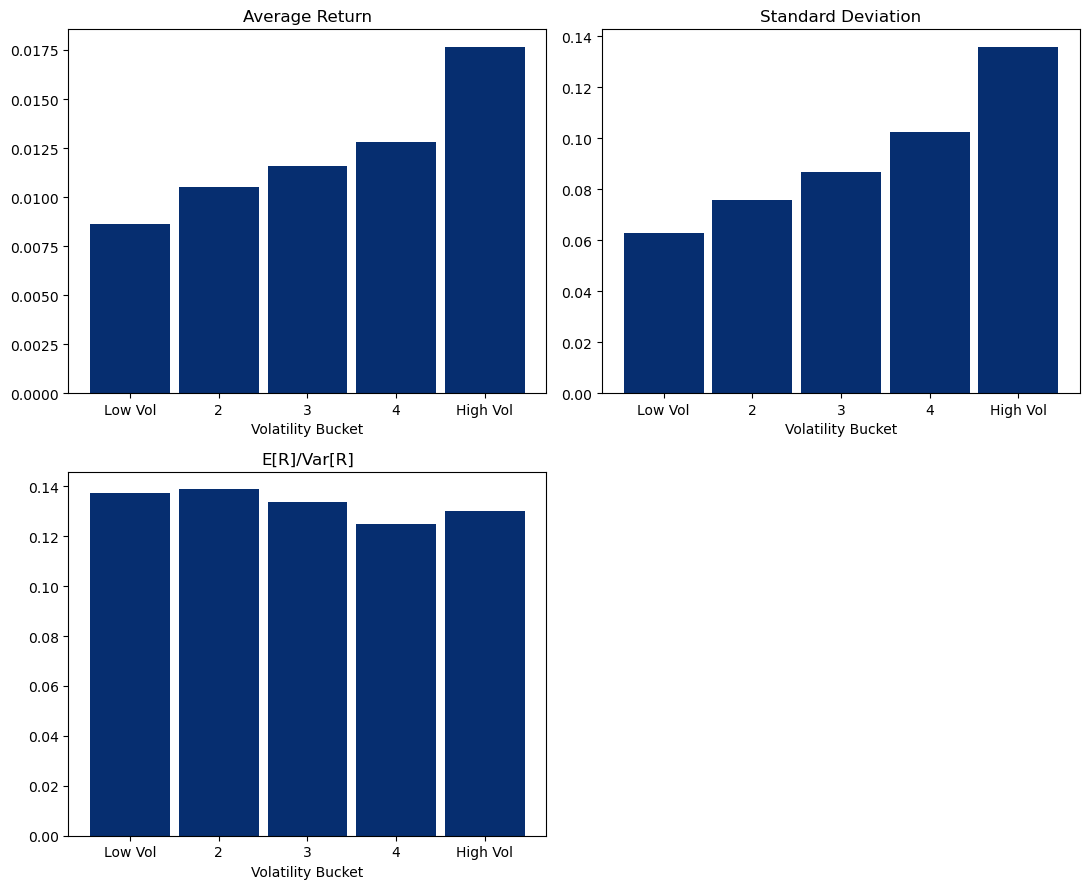

In [7]:
# Plot the data
titles = ["Average Return", "Standard Deviation", "E[R]/Var[R]"]
x_labels = ["Low Vol", "2", "3", "4", "High Vol"]

# Create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(11, 9))

# Flatten the axs array for easier indexing
axs = axs.flatten()

for i, column in enumerate(buckets_vol.columns):
    title = f"{titles[i]}"
    ax = axs[i]
    ax.bar(x_labels, buckets_vol[column], color='#062e70', width=0.9)
    ax.set_title(title)
    ax.set_xticklabels(x_labels, rotation=0)
    ax.set_xlabel("Volatility Bucket")

# Hide the empty subplot in the last position
axs[-1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

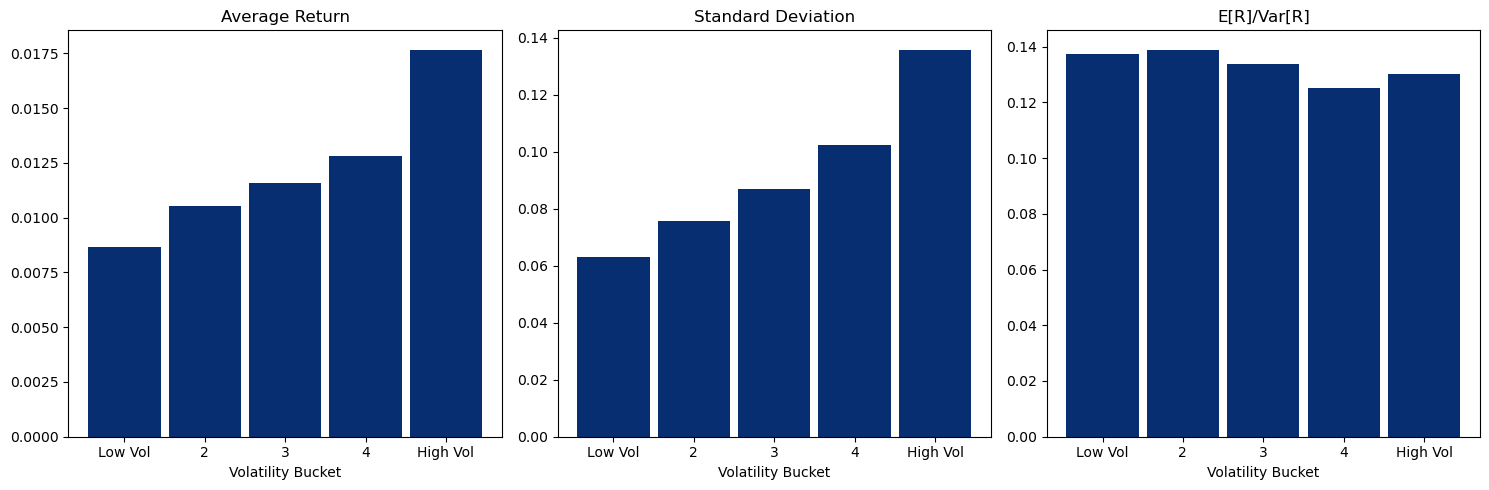

In [8]:
# Plot the data
titles = ["Average Return", "Standard Deviation", "E[R]/Var[R]"]
x_labels = ["Low Vol", "2", "3", "4", "High Vol"]

# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Flatten the axs array for easier indexing
axs = axs.flatten()

for i, column in enumerate(buckets_vol.columns):
    title = f"{titles[i]}"
    ax = axs[i]
    ax.bar(x_labels, buckets_vol[column], color='#062e70', width=0.9)
    ax.set_title(title)
    ax.set_xticklabels(x_labels, rotation=0)
    ax.set_xlabel("Volatility Bucket")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()